In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
df = pd.read_csv("X data.csv")


In [7]:
df.head(15)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [9]:
# Column names
print(df.columns)

# Check duplicate rows
df.duplicated().sum()


Index(['clean_text', 'category'], dtype='object')


np.int64(2)

In [10]:
# Check missing values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

Remove rows with null clean_text

In [11]:
df.dropna(subset=['clean_text'], inplace=True)


In [12]:
df.drop_duplicates(inplace=True)

Cleaning clean_text column

In [13]:
def fix_encoding(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

df['clean_text'] = df['clean_text'].astype(str).apply(fix_encoding)


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_pipeline(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation & numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhala\AppData\Roaming\nltk_data...


In [15]:
df['processed_text'] = df['clean_text'].apply(clean_text_pipeline)


In [16]:
df[['clean_text', 'processed_text']]


,clean_text,processed_text
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,answer among powerful world leader today trump...
...,...,...
162975,why these 456 crores paid neerav modi not reco...,crore paid neerav modi recovered congress lead...
162976,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar modi killing pl...
162977,did you cover her interaction forum where she ...,cover interaction forum left
162978,there big project came into india modi dream p...,big project came india modi dream project happ...


In [17]:
df[['clean_text', 'processed_text']].to_csv(
    "text_cleaning_preview.csv",
    index=False,
    encoding="utf-8"
)


In [19]:
df.to_csv(
    "twitter_sentiment_cleaned.csv",
    index=False,
    encoding="utf-8"
)


In [20]:
df[df['category'].notna()].to_csv(
    "twitter_sentiment_fully_labeled.csv",
    index=False,
    encoding="utf-8"
)


In [21]:
df.isnull().sum()


clean_text        0
category          7
processed_text    0
dtype: int64

In [24]:
df[df['category'].isna()][['clean_text', 'processed_text', 'category']]


,clean_text,processed_text,category
130448,the foundation stone northeast gas grid inaugu...,foundation stone northeast gas grid inaugurate...,NaN
155642,dear terrorists you can run but you cant hide ...,dear terrorist run cant hide giving year modi see,NaN
155698,offense the best defence with mission shakti m...,offense best defence mission shakti modi prove...,NaN
155770,have always heard politicians backing out thei...,always heard politician backing promise modi f...,NaN
158693,modi government plans felicitate the faceless ...,modi government plan felicitate faceless namel...,NaN
159442,chidambaram gives praises modinomics,chidambaram give praise modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,reason modi contested seat real reason rahul,NaN


In [25]:
df[df['category'].isna()].head()


,clean_text,category,processed_text
130448,the foundation stone northeast gas grid inaugu...,NaN,foundation stone northeast gas grid inaugurate...
155642,dear terrorists you can run but you cant hide ...,NaN,dear terrorist run cant hide giving year modi see
155698,offense the best defence with mission shakti m...,NaN,offense best defence mission shakti modi prove...
155770,have always heard politicians backing out thei...,NaN,always heard politician backing promise modi f...
158693,modi government plans felicitate the faceless ...,NaN,modi government plan felicitate faceless namel...


In [26]:
df['category'].value_counts(dropna=False)


category
 1.0    72249
 0.0    55210
-1.0    35509
 NaN        7
Name: count, dtype: int64

In [27]:
labeled_df = df[df['category'].notna()]
unlabeled_df = df[df['category'].isna()]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train = tfidf.fit_transform(labeled_df['processed_text'])
y_train = labeled_df['category']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
X_unlabeled = tfidf.transform(unlabeled_df['processed_text'])
unlabeled_df['category'] = model.predict(X_unlabeled)


C:\Users\bhala\AppData\Local\Temp\ipykernel_2168\2368494070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['category'] = model.predict(X_unlabeled)


In [30]:
df = pd.concat([labeled_df, unlabeled_df], axis=0)
df.reset_index(drop=True, inplace=True)


In [31]:
df['category'].value_counts(dropna=False)


category
 1.0    72252
 0.0    55214
-1.0    35509
Name: count, dtype: int64

In [33]:
mask = df['category'].isna()


In [34]:
mask.sum()


np.int64(0)

In [35]:
df.isnull().sum()


clean_text        0
category          0
processed_text    0
dtype: int64

In [36]:
df['category'].value_counts(dropna=False)


category
 1.0    72252
 0.0    55214
-1.0    35509
Name: count, dtype: int64

In [37]:
df.columns


Index(['clean_text', 'category', 'processed_text'], dtype='object')

In [38]:
df.isnull().sum()


clean_text        0
category          0
processed_text    0
dtype: int64

Cleaned Raw File

In [40]:
df[['processed_text', 'category']].to_csv(
    "twitter_sentiment_model_ready.csv",
    index=False,
    encoding="utf-8"
)


## 1. Load the Final Clean Dataset

In [43]:
import pandas as pd

df = pd.read_csv("twitter_sentiment_model_ready.csv")
df.head()


,processed_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


## Task 1: Overall Sentiment Landscape on X

### Goal:

What is the overall distribution of public sentiment on X with respect to political discourse?


In [44]:
sentiment_counts = df['category'].value_counts().sort_index()
sentiment_counts


category
-1.0    35509
 0.0    55214
 1.0    72252
Name: count, dtype: int64

#### Map labels for clarity:

In [45]:
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)


#### Visualization

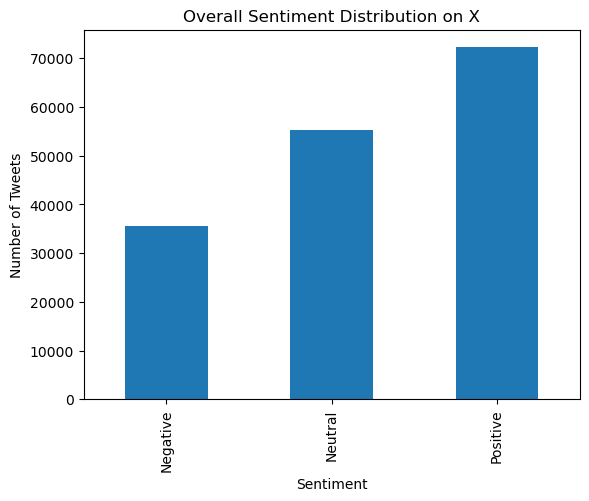

In [46]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title("Overall Sentiment Distribution on X")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


### Insight

The sentiment distribution reveals that positive sentiment dominates political discourse on X, followed by neutral commentary. Negative sentiment, while less prevalent, represents a meaningful and non-negligible portion of public opinion.


## Task 2: Topic-Based Sentiment Analysis

### Goal:

 How does public sentiment vary across major political topics discussed on X?

In [57]:
topics = {
    'Elections': ['vote', 'election', 'campaign'],
    'Economy & Reforms': ['gst', 'demonetisation', 'tax', 'economy'],
    'National Security': ['terrorist', 'defence', 'mission'],
    'Leadership': ['modi', 'bjp', 'rahul']
}

topic_mapping = {
    'Leadership': ['modi','modis','narendra','rahul','gandhi','bjp','congress'],
    'Elections': ['election','vote','power','party'],
    'Governance': ['government','govt','nation','country','india','indian']
}

for topic, words in topic_mapping.items():
    matched = set(words).intersection(set(top_words))
    print(f"{topic}: {matched}")


Leadership: {'narendra', 'modi', 'bjp', 'gandhi', 'rahul', 'modis', 'congress'}
Elections: {'election', 'party', 'vote', 'power'}
Governance: {'government', 'govt', 'country', 'indian', 'india', 'nation'}


In [58]:
topic_sentiment = {}

for topic, keywords in topics.items():
    pattern = '|'.join(keywords)
    subset = df[df['processed_text'].str.contains(pattern, na=False)]
    topic_sentiment[topic] = subset['category'].mean()

topic_sentiment_df = pd.DataFrame.from_dict(
    topic_sentiment,
    orient='index',
    columns=['Average Sentiment']
)

topic_sentiment_df


,Average Sentiment
Elections,0.272138
Economy & Reforms,0.150835
National Security,0.269321
Leadership,0.224186


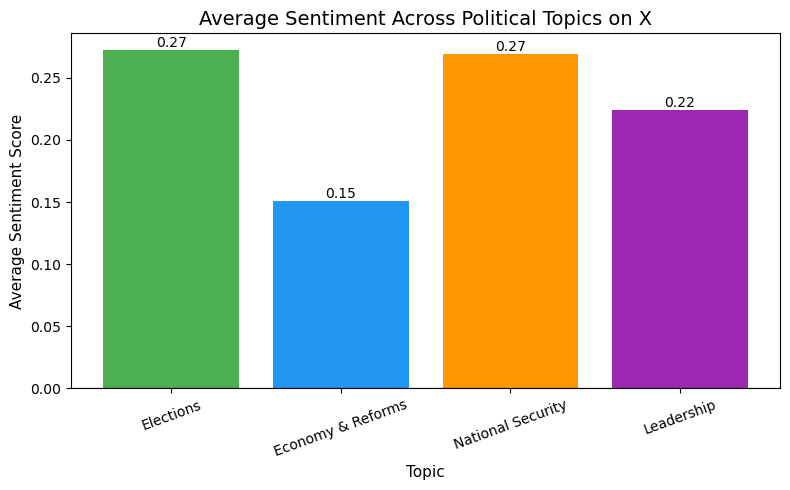

In [60]:
import matplotlib.pyplot as plt

# Colors for each topic (soft but clear)
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

plt.figure(figsize=(8, 5))

bars = plt.bar(
    topic_sentiment_df.index,
    topic_sentiment_df['Average Sentiment'],
    color=colors
)

# Zero reference line (important for sentiment)
plt.axhline(0, color='black', linewidth=0.8)

# Labels & title
plt.title("Average Sentiment Across Political Topics on X", fontsize=14)
plt.xlabel("Topic", fontsize=11)
plt.ylabel("Average Sentiment Score", fontsize=11)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom' if height >= 0 else 'top'
    )

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## Keyword selection

In [53]:
from collections import Counter

all_words = Counter(
    " ".join(df['processed_text'].astype(str)).split()
)


keywords_to_check = [
    'modi', 'bjp', 'rahul',
    'vote', 'election', 'campaign',
    'gst', 'demonetisation', 'economy', 'tax',
    'terrorist', 'defence', 'mission'
]

for word in keywords_to_check:
    print(f"{word}: {all_words[word]}")


modi: 155638
bjp: 14664
rahul: 7263
vote: 10935
election: 11718
campaign: 2472
gst: 683
demonetisation: 535
economy: 1711
tax: 1716
terrorist: 1735
defence: 835
mission: 2932


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=30)

X = tfidf.fit_transform(
    df['processed_text'].astype(str)
)


In [56]:
top_words = tfidf.get_feature_names_out()
top_words


array(['also', 'bjp', 'congress', 'country', 'dont', 'election', 'even',
       'gandhi', 'get', 'give', 'government', 'govt', 'india', 'indian',
       'know', 'like', 'modi', 'modis', 'narendra', 'nation', 'one',
       'party', 'people', 'power', 'rahul', 'say', 'time', 'vote', 'want',
       'year'], dtype=object)

## Linguistic Patterns Behind Sentiment

### Goal:
What linguistic patterns characterize positive and negative sentiment on X?

In [61]:
positive_df = df[df['category'] == 1]
neutral_df  = df[df['category'] == 0]
negative_df = df[df['category'] == -1]


In [62]:
from collections import Counter

def get_top_words(text_series, n=15):
    words = " ".join(text_series.astype(str)).split()
    return Counter(words).most_common(n)

top_positive_words = get_top_words(positive_df['processed_text'])
top_neutral_words  = get_top_words(neutral_df['processed_text'])
top_negative_words = get_top_words(negative_df['processed_text'])

top_positive_words, top_negative_words


([('modi', 70523),
  ('india', 17075),
  ('people', 7215),
  ('bjp', 7062),
  ('like', 6243),
  ('election', 5946),
  ('congress', 5867),
  ('narendra', 5536),
  ('vote', 5214),
  ('one', 5160),
  ('govt', 4905),
  ('country', 4852),
  ('indian', 4823),
  ('good', 4819),
  ('time', 4724)],
 [('modi', 35260),
  ('india', 6739),
  ('people', 4231),
  ('bjp', 3621),
  ('like', 3556),
  ('congress', 3470),
  ('poor', 2680),
  ('govt', 2634),
  ('year', 2568),
  ('election', 2439),
  ('indian', 2405),
  ('one', 2371),
  ('dont', 2342),
  ('vote', 2261),
  ('say', 2260)])

In [63]:
import pandas as pd

pos_df = pd.DataFrame(top_positive_words, columns=['Word', 'Frequency'])
neg_df = pd.DataFrame(top_negative_words, columns=['Word', 'Frequency'])
neu_df = pd.DataFrame(top_neutral_words, columns=['Word', 'Frequency'])


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def sentiment_tfidf(df_subset, n=15):
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df_subset['processed_text'].astype(str))
    
    scores = X.mean(axis=0).A1
    words = tfidf.get_feature_names_out()
    
    tfidf_df = pd.DataFrame({
        'word': words,
        'score': scores
    }).sort_values('score', ascending=False)
    
    return tfidf_df.head(n)


In [75]:
pos_tfidf = sentiment_tfidf(df[df['category'] == 1])
neg_tfidf = sentiment_tfidf(df[df['category'] == -1])
neu_tfidf = sentiment_tfidf(df[df['category'] == 0])


In [65]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize': (9, 5),
    'axes.titlesize': 14,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.spines.top': False,
    'axes.spines.right': False
})


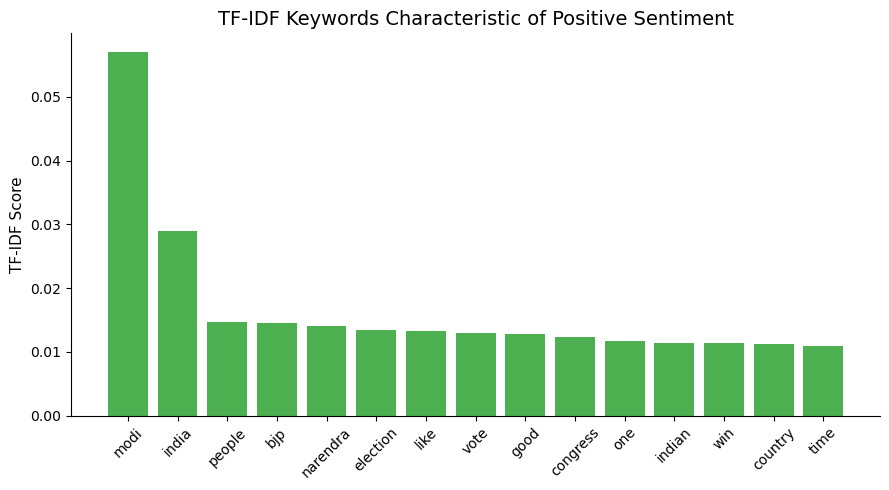

In [71]:
plt.figure()
plt.bar(pos_tfidf['word'], pos_tfidf['score'], color='#4CAF50')
plt.title("TF-IDF Keywords Characteristic of Positive Sentiment")
plt.xticks(rotation=45)
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.savefig("positive_tfidf_words.png", dpi=300)
plt.show()


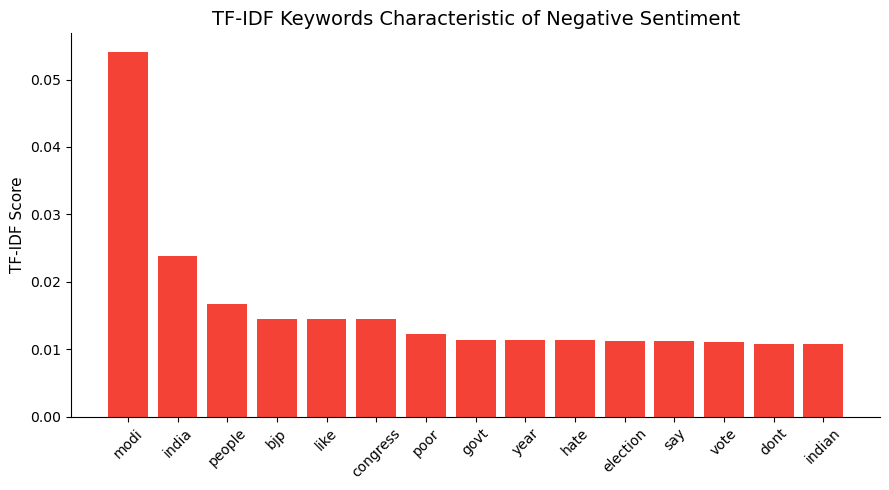

In [72]:
plt.figure()
plt.bar(neg_tfidf['word'], neg_tfidf['score'], color='#F44336')
plt.title("TF-IDF Keywords Characteristic of Negative Sentiment")
plt.xticks(rotation=45)
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.savefig("negative_tfidf_words.png", dpi=300)
plt.show()


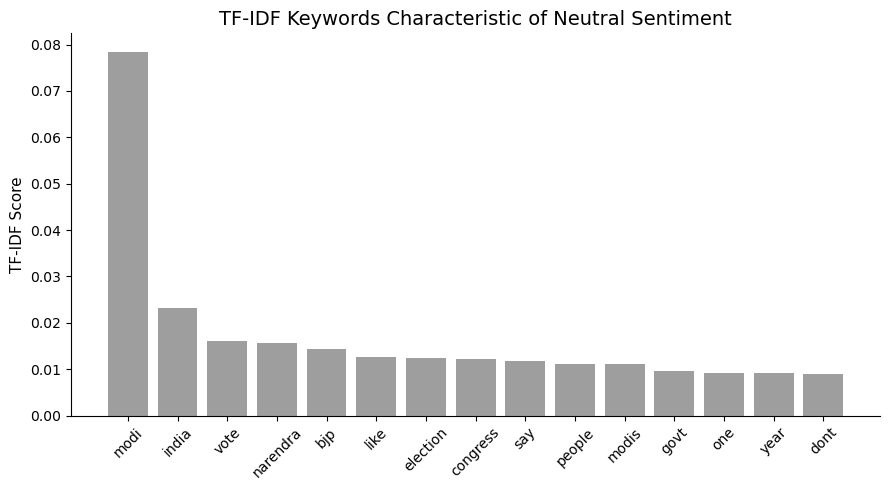

In [73]:
plt.figure()
plt.bar(neu_tfidf['word'], neu_tfidf['score'], color='#9E9E9E')
plt.title("TF-IDF Keywords Characteristic of Neutral Sentiment")
plt.xticks(rotation=45)
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.savefig("neutral_tfidf_words.png", dpi=300)
plt.show()
